/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


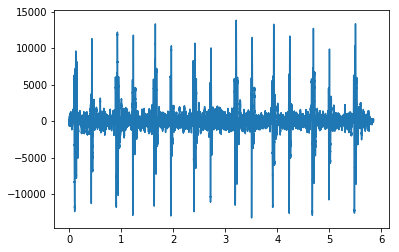

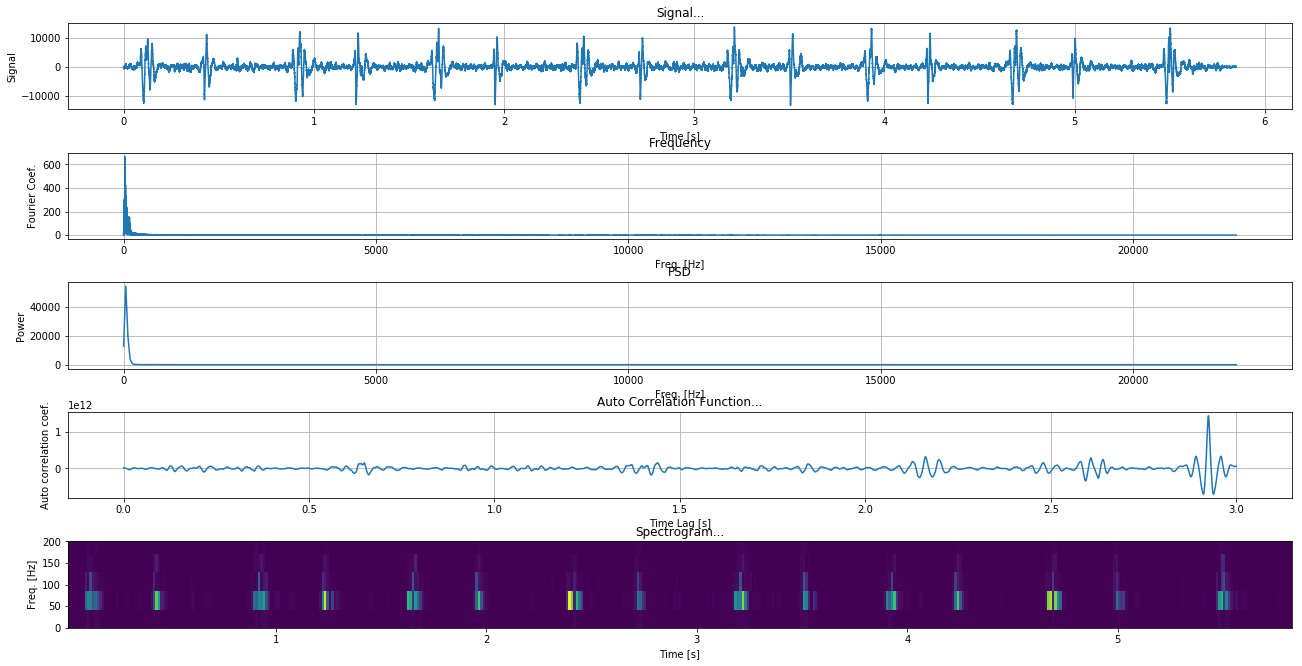

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import wave
import sys

# file to open
file = './input/set_a/normal__201106210943.wav'

# plot time series
with wave.open(file,'r') as wav_file:
    #Extract Raw Audio from Wav File
    signal = wav_file.readframes(-1)
    signal = np.fromstring(signal, 'Int16')

    #Split the data into channels 
    channels = [[] for channel in range(wav_file.getnchannels())]
    for index, datum in enumerate(signal):
        channels[index%len(channels)].append(datum)

    #Get time from indices
    fs = wav_file.getframerate()
    Time = np.linspace(0, len(signal)/len(channels)/fs, num=len(signal)/len(channels))

    #Channels
    for channel in channels:
        plt.plot(Time,channel)


# get data for channel 0
N = len(channels[0])
T = 1.0 / fs
x = np.linspace(0.0, N*T, N) # x = time data
y = channels[0]

# plot signal for channel-0
num_fig = 5
plt.figure(figsize = (20, 5 * 2)) # 20 inches width, 2 inches height per graph

plt.subplot(num_fig, 1, 1)
plt.plot(x, y)
plt.title('Signal...')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()

# plot freq. for channel-0
yf = sp.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.subplot(num_fig, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Frequency')
plt.xlabel('Freq. [Hz]')
plt.ylabel('Fourier Coef.')
plt.grid()


# plot power spectral density
from scipy.signal import welch
f, Pxx = welch(y, fs, nperseg = 2 ** 10)

plt.subplot(num_fig, 1, 3)
plt.plot(f, Pxx)
plt.title('PSD')
plt.xlabel('Freq. [Hz]')
plt.ylabel('Power')
plt.grid()

# get auto correlation fuction
from scipy.signal import correlate
from scipy.signal import detrend

y_detrend = detrend(y)
Ryy = correlate(y_detrend, y_detrend, mode = 'same')

plt.subplot(num_fig, 1, 4)
n_x = int(3.0 * fs)
plt.plot(Time[0:n_x], Ryy[0:n_x])
plt.title('Auto Correlation Function...')
plt.xlabel('Time Lag [s]')
plt.ylabel('Auto correlation coef.')
plt.grid()

# get spectrogram
from scipy.signal import spectrogram
f, t, Sxx = spectrogram(y_detrend, fs = fs, nperseg= 2**10, noverlap = 2**9)
plt.subplot(num_fig, 1, 5)
plt.pcolormesh(t, f, Sxx)
plt.title('Spectrogram...')
plt.ylabel('Freq. [Hz]')
plt.xlabel('Time [s]')
plt.ylim(0,200)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
plt.show()